In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn as skl
from scipy.fftpack import fft, ifft, dct, idct

In [2]:
rawData = pdr.DataReader("SI=F", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')

rawData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,16.224173,16.099245,16.173217,16.153855,2087.618474,16.153855
std,1.224427,1.172634,1.203125,1.193147,12010.163442,1.193147
min,14.310000,14.245000,14.300000,14.281000,0.000000,14.281000
25%,15.185000,15.043000,15.140000,15.068000,4.000000,15.068000
50%,15.837000,15.790000,15.820000,15.791000,27.000000,15.791000
75%,17.188000,17.100000,17.156000,17.125000,103.000000,17.125000
max,19.540001,19.215000,19.485001,19.391001,97738.000000,19.391001


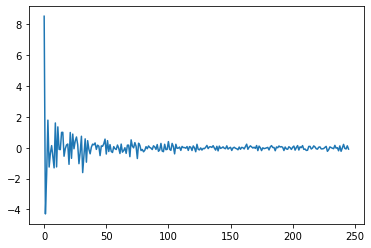

In [3]:
inputs = rawData['Open'].to_numpy()
N = len(rawData)
T = 24
series = np.linspace( 0, N / T, N )
y = dct(inputs, norm = 'ortho' )
plt.plot(y[3:])

In [4]:
print( y.min(), np.quantile(y, 0.25), y.mean(), np.quantile(y, 0.75), y.max() )

-14.422173535321972 -0.11567985684876769 0.9918605898088392 0.10724023260564199 255.20905762764002


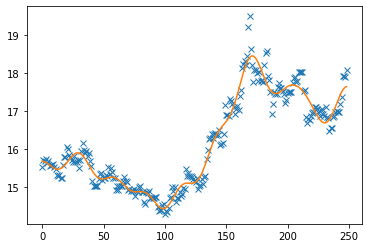

In [5]:
y1 = y
y1[20:] = 0
extracts = idct(y1, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts)

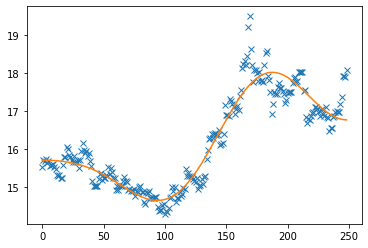

In [6]:
highFs = []
for i in y:
    if np.abs(i) > np.quantile(y, 0.99):
        highFs.append(i)
    else:
        highFs.append(0)
extracts2 = idct(highFs, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts2)

In [7]:
### Lets try using the data for January 2020 and exract signals with high frequecies inorder to identify the dominant signals in the time series at that time
janData = pdr.DataReader("SI=F", 
                       start='2020-1-1', 
                       end='2020-1-31', 
                       data_source='yahoo')
janData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,17.999320,17.884240,17.932360,17.939720,21092.760000,17.939720
std,0.237388,0.215333,0.217858,0.217893,65233.593364,0.217893
min,17.450001,17.370001,17.450001,17.402000,0.000000,17.402000
25%,17.875000,17.760000,17.771000,17.860001,5.000000,17.860001
50%,18.000000,17.965000,17.969999,17.972000,50.000000,17.972000
75%,18.105000,18.020000,18.033001,18.068001,175.000000,18.068001
max,18.504999,18.209999,18.400000,18.316000,282925.000000,18.316000


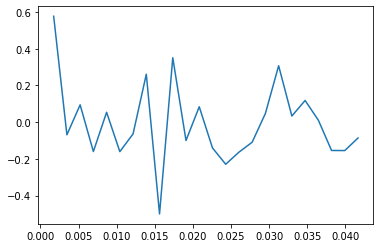

In [8]:
### We are tracking the signals for opening price of the stock 
inputs2 = janData['Open'].to_numpy()
N2 = len(janData)
### since the data is in days lets use 24hours as our time
T2 = 24
### now we use the dct to convert our time series into a frequency domain
series2 = np.linspace( 0,  1 /  T2 , N2 )
y2 = dct(inputs2, norm = 'ortho' )
plt.plot(series2[ 1 : ], y2[ 1 : ] )

In [9]:
## let's understand how spread our data is
print( y2.min(), np.quantile(y2, 0.25), y2.mean(), np.quantile(y2, 0.75), y2.max() )

-0.4994177489873688 -0.15408132701508026 3.580404080773869 0.09436002635905477 89.66180038452148


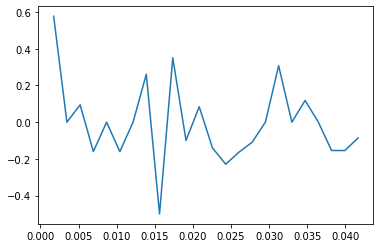

In [128]:
### We are now going to extract only relevant frequecies from the extraction (Frequencies with high amplitudes)
highFs1 = []
indexes = []
count = 0 
for i in y2:
    if np.abs(i) > np.quantile(y2, 0.7):
        highFs1.append(i)
        indexes.insert(count, np.where(y2 == i))
        count += 1
    else:
        highFs1.append(0)
extracts3 = idct(highFs1, norm = "ortho")
ax = plt.subplot(111)
li = ax.plot(series2[ 1 : ], highFs1[ 1 : ] )


In [132]:
frequecies = li[0].get_data()[0]
amplitudes = li[0].get_data()[1]
coordinates = [[],[]]

for i in amplitudes:
    if i != 0:
        coordinates[0].append(i)
        coordinates[1].append(frequecies[ np.where(amplitudes == i)[0][0] ]) 
coordinates[0], coordinates[1] = zip(*sorted(zip(coordinates[0], coordinates[1])))
coordinates

[(-0.4994177489873688,
  -0.22907624076848027,
  -0.1634144874176712,
  -0.1603905217459382,
  -0.15991654824666754,
  -0.1545571240239505,
  -0.15408132701508026,
  -0.14004900393651398,
  -0.10907367872846518,
  -0.0998309907406239,
  -0.08609531094885756,
  0.0838692582755369,
  0.09436002635905477,
  0.1180764752634774,
  0.2608247367375103,
  0.30709258061178535,
  0.35057197864109557,
  0.5765232855501484),
 (0.015625,
  0.024305555555555552,
  0.026041666666666664,
  0.010416666666666666,
  0.006944444444444444,
  0.03993055555555555,
  0.03819444444444444,
  0.022569444444444444,
  0.027777777777777776,
  0.01909722222222222,
  0.041666666666666664,
  0.020833333333333332,
  0.005208333333333333,
  0.034722222222222224,
  0.013888888888888888,
  0.03125,
  0.017361111111111112,
  0.001736111111111111)]

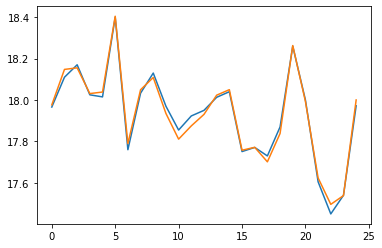

In [130]:
xf = np.linspace(0.0, N, 25)
plt.plot( inputs2 )
plt.plot( extracts3)


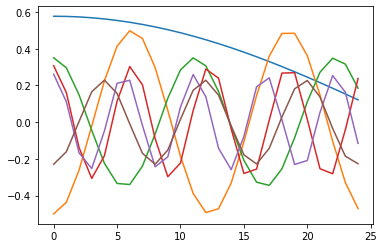

In [134]:
signal1 = 0.5765232855501484 * np.cos(np.pi * 0.00173611 * xf)
signal2 = -0.4994177489873688 * np.cos(np.pi * 0.015625 * xf) 
signal3 = 0.35057197864109557 * np.cos(np.pi * 0.01736111 * xf)
signal4 = 0.30709258061178535 * np.cos(np.pi * 0.03125 * xf) 
signal5 = 0.2608247367375103 * np.cos(np.pi * 0.03472222 * xf) 
signal6 = -0.22907624076848027 * np.cos(np.pi * 0.024305555555555552 * xf) 
plt.plot(signal1)
plt.plot(signal2)
plt.plot(signal3)
plt.plot(signal4)
plt.plot(signal5)
plt.plot(signal6)

Text(0.5, 0, 'Time Domian')

<Figure size 432x288 with 0 Axes>

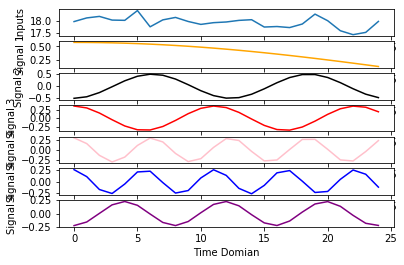

In [158]:
plt.figure()
f, axes = plt.subplots(7)
axes[0].plot(inputs2)
axes[0].set_ylabel('Inputs')
axes[0].set_xlabel('Time Domian')


axes[1].plot(signal1, 'orange')
axes[1].set_ylabel('Signal 1')
axes[1].set_xlabel('Time Domian')


axes[2].plot( signal2, 'black')
axes[2].set_ylabel('Signal 2')
axes[2].set_xlabel('Time Domian')

axes[3].plot(signal3, 'red')
axes[3].set_ylabel('Signal 3')
axes[3].set_xlabel('Time Domian')

axes[4].plot( signal4, 'pink')
axes[4].set_ylabel('Signal 4')
axes[4].set_xlabel('Time Domian')

axes[5].plot( signal5, 'blue')
axes[5].set_ylabel('Signal 4')
axes[5].set_xlabel('Time Domian')

axes[6].plot( signal6, 'purple')
axes[6].set_ylabel('Signal 4')
axes[6].set_xlabel('Time Domian')

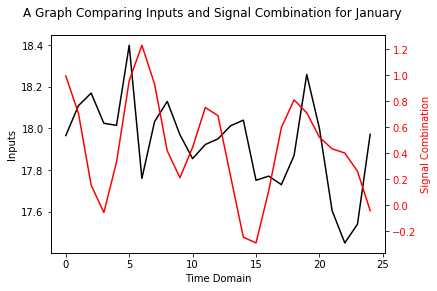

In [150]:
relevantSignal = signal1 + signal2 + signal3 + signal4 + signal5
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(inputs2, 'black')
ax1.set_ylabel('Inputs')
ax1.set_xlabel('Time Domain')

ax2 = ax1.twinx()
ax2.plot(relevantSignal, 'r-')
ax2.set_ylabel('Signal Combination', color='r')

plt.suptitle('A Graph Comparing Inputs and Signal Combination for January')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [16]:
febData = pdr.DataReader("SI=F", 
                       start='2020-2-1', 
                       end='2020-2-29', 
                       data_source='yahoo')
febData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000
mean,17.962739,17.823218,17.928392,17.914478,2.330220e+06,17.914478
std,0.392591,0.483037,0.358591,0.387123,1.108738e+07,0.387123
min,17.478001,16.340000,17.478001,17.478001,0.000000e+00,17.478001
25%,17.715000,17.600000,17.692500,17.649000,3.000000e+00,17.649000
50%,17.795000,17.715000,17.789000,17.757999,1.000000e+01,17.757999
75%,18.157001,18.138000,18.138000,18.157001,4.315000e+02,18.157001
max,18.868000,18.690001,18.690001,18.868000,5.319074e+07,18.868000


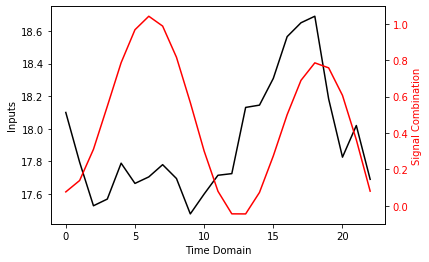

In [139]:
highFs2 = []
for i in y2:
    if np.abs(i) > np.quantile(y2, 0.8):
        highFs.append(i)
    else:
        highFs2.append(0)
extracts3 = idct(highFs2, norm = "ortho")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(febData['Open'].to_numpy(), 'black')
ax1.set_ylabel('Inputs')
ax1.set_xlabel('Time Domain')

ax2 = ax1.twinx()
ax2.plot(signal1[ : len(febData) ] +  signal2[ : len(febData) ] , 'r-')
ax2.set_ylabel('Signal Combination', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')
